In [1]:
from image_preprocessing import *

In [4]:
path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_icon'

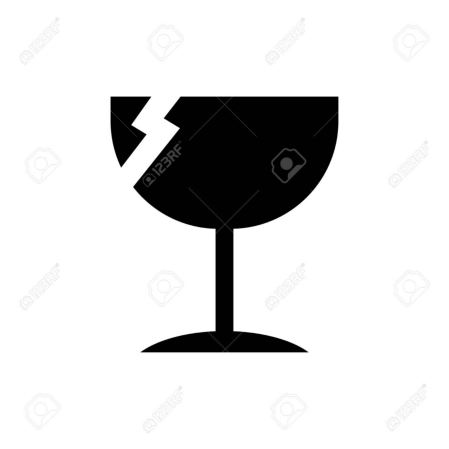

18


In [6]:
img_list = get_img(path)
show(img_list[0])
print(len(img_list))

In [19]:
def img_trim(img):
    img_ = img.copy()

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #워터마크 지우기
    blur = cv2.GaussianBlur(img, ksize=(7,7), sigmaX=100)
    ret, thresh1 = cv2.threshold(blur, img.mean(), 255, cv2.THRESH_BINARY)

    #엣지찾기
    edged = cv2.Canny(blur, 10, 250)

    #closed edge
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

    #finding contour
    cont, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    total=0

    #drawing contour
    # cont_img = cv2.drawContours(img, cont, -1, (0, 255, 0),3)

    #contours info
    contours_xy = np.array(cont)
    contours_xy.shape

    # x의 min과 max 찾기
    x_min, x_max = 0,0
    value = list()
    for i in range(len(contours_xy)):
        for j in range(len(contours_xy[i])):
            value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
            x_min = min(value)
            x_max = max(value)

    # y의 min, max
    y_min, y_max = 0,0
    value = list()
    for i in range(len(contours_xy)):
        for j in range(len(contours_xy[i])):
            value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
            y_min = min(value)
            y_max = max(value)

    # image trim
    x = x_min
    y = y_min
    w = (x_max-x_min)
    h = (y_max-y_min)

    img_trim = img_[y:y+h, x:x+w]

    return img_trim

#### Triming

In [ ]:
list_file = file_list(path)

In [ ]:
file_name = []
for i in list_file:
    file_name.append(i.split('/')[-1].split('fragile_icon')[-1])

In [ ]:
save_path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_trim/'

for num, i in enumerate (img_list):
    try :
        img = img_trim(i)
        cv2.imwrite(save_path +'trimed_{}.jpg'.format(file_name[num]),img)
        print(num,'done')
    except:
        pass
        print('img_trim failed')

#### augmentation

##### resizing

In [ ]:
path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_trim'
img_list = get_img(path)
list_file = file_list(path)
file_name = []
for i in list_file:
    file_name.append(i.split('/')[-1].split('fragile_trimtrimed_')[-1])

In [ ]:
for num, i in enumerate (img_list):
    try :
        img = cv2.resize(img,dsize=(100, 100))
        cv2.imwrite(save_path +'trim_resized_{}.jpg'.format(file_name[num]),img)
        print(num,'done')
    except:
        pass
        print('img_trim failed')

##### degree

In [ ]:
path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_trim'
img_list = get_img(path)
list_file = file_list(path)
file_name = []
for i in list_file:
    file_name.append(i.split('/')[-1].split('trim_resized_')[-1])
file_name

In [ ]:
for num, i in enumerate (img_list):
    try :
        img90 = cv2.rotate(i, cv2.ROTATE_90_CLOCKWISE)
        img180 = cv2.rotate(i, cv2.ROTATE_180)
        img270 = cv2.rotate(i, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(save_path +'img90_{}.jpg'.format(file_name[num]),img90)
        cv2.imwrite(save_path +'img180_{}.jpg'.format(file_name[num]),img180)
        cv2.imwrite(save_path +'img270_{}.jpg'.format(file_name[num]),img270)
        print(num,'done')
    except:
        pass
        print('failed')

##### 밝기

In [21]:
path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_trim'
img_list = get_img(path)
list_file = file_list(path)
file_name = []
for i in list_file:
    file_name.append(i.split('/')[-1].split('trim_resized_')[-1].split('.jpg')[0])
# file_name

In [ ]:
save_path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_trim/'
for i in range (50, 190, 10):
    for num,j in enumerate (img_list):
        try:
            array = np.full(j.shape,(i,i,i), dtype=np.uint8)
            add = cv2.add(j, array)
            sub = cv2.subtract(j, array)
            cv2.imwrite(save_path+'add_{}_{}.jpg'.format(i, file_name[num]),add)
            print('add_done', i, file_name[num])
            cv2.imwrite(save_path+'sub_{}_{}.jpg'.format(i,file_name[num]),sub)
            print('sub_done', i, file_name[num]) 
        except:
            pass
            print('{} is failed'.format(file_name[num]))

##### demaged

In [2]:
import random

In [3]:
path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_trim'
img_list = get_img(path)
list_file = file_list(path)
file_name = []
for i in list_file:
    file_name.append(i.split('/')[-1].split('.jpg')[0])
print(file_name[2])
print(len(img_list))

fragile_trimadd_100_Fragile-icon-vector-by-Hoeda80
1740


In [4]:
import random

list_cor = []
for s in range(len(img_list)):
    col_list = []
    ran_num = random.randint(0,101)
    for i in range(7):
        while ran_num in col_list:
            ran_num = random.randint(0,101)
        col_list.append(ran_num)

    x,y,z,k,i,j,f = col_list
    list_cor.append(col_list)
list_cor[0]

[101, 76, 74, 0, 70, 93, 24]

In [ ]:
save_path = '/Users/monica_air/Documents/Sign recognition/BrandNew/fragile_trim/'

for num, j in enumerate (img_list):
    try:
        x, y, z, k, a, b, c = list_cor[num]
        rec = cv2.rectangle(j, (x,y),(z,k),(a,b,c),-1)
        cv2.imwrite(save_path+'damaged_{}{}.jpg'.format(num, file_name[num]), rec)
        print('{}_done'.format(file_name[num]))
    except:
        pass
        print('work_failed')
    